# A04 - Data Wrangling

---

```{admonition} Revised
19 Jun 2023
```
```{contents}
```

---

## Programming Environment

In [1]:
library(tidyverse)  # includes lots of data verbs like `group_by()` and `summarise()`
library(mosaicData) # includes the `HELPmiss` data set

sessionInfo()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R version 4.3.0 (2023-04-21)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] mosaicData_0.20.3 lubridate_1.9.2   forcats_1.0.0     stringr_1.5.0    
 [5] dplyr_1.1.2       purrr_1.0.1       readr_2.1.4       tidyr_1.3.0      
 [9] tibble_3.2.1      ggplot2_3.4.2     tidyverse_2.0.0  

loaded via a namespace (and not attached):
 [1] gtable_0.3.3     jsonlite_1.8.5   compiler_4.3.0   crayon_1.5.2    
 [5] tidyselect_1.2.0 IRdisplay_1.1    scales_1.2.1     uuid_1.1-0      
 [9] f

---

In [2]:
# Load the `HELPmiss` data set into our RStudio environment
#   data("HELPmiss", package = "mosaicData")

?mosaicData::HELPmiss

HELPmiss              package:mosaicData               R Documentation

_H_e_a_l_t_h _E_v_a_l_u_a_t_i_o_n _a_n_d _L_i_n_k_a_g_e _t_o _P_r_i_m_a_r_y _C_a_r_e

_D_e_s_c_r_i_p_t_i_o_n:

     The HELP study was a clinical trial for adult inpatients recruited
     from a detoxification unit.  Patients with no primary care
     physician were randomized to receive a multidisciplinary
     assessment and a brief motivational intervention or usual care,
     with the goal of linking them to primary medical care.

_U_s_a_g_e:

     data(HELPmiss)
     
_F_o_r_m_a_t:

     Data frame with 470 observations on the following variables.

        • ‘age’ subject age at baseline (in years)

        • ‘anysub’ use of any substance post-detox: a factor with
          levels ‘no’ ‘yes’

        • ‘cesd’ Center for Epidemiologic Studies Depression measure of
          depressive symptoms at baseline (higher scores indicate more
          symptom

In [3]:
head(HELPmiss)

,age,anysub,cesd,d1,daysanysub,dayslink,drugrisk,e2b,female,sex,⋯,pcs,pss_fr,racegrp,satreat,sexrisk,substance,treat,avg_drinks,max_drinks,hospitalizations
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,⋯,<dbl>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,37,yes,49,3,177,225,0,NA,0,male,⋯,58.41369,0,black,no,4,cocaine,yes,13,26,3
2,37,yes,30,22,2,NA,0,NA,0,male,⋯,36.03694,1,white,no,7,alcohol,yes,56,62,22
3,26,yes,39,0,3,365,20,NA,0,male,⋯,74.80633,13,black,no,2,heroin,no,0,0,0
4,39,yes,15,2,189,343,0,1,1,female,⋯,61.93168,11,white,yes,4,heroin,no,5,5,2
5,32,yes,39,12,2,57,0,1,0,male,⋯,37.34558,10,black,no,6,cocaine,no,10,13,12
6,47,yes,6,1,31,365,0,NA,1,female,⋯,46.47521,5,black,no,5,cocaine,yes,4,4,1


In [4]:
# number of cases
HELPmiss %>%
  summarize(count = n())

count
<int>
470


In [5]:
# total e2b
HELPmiss %>%
  summarize(
    total_e2b = sum(e2b, na.rm = TRUE)
  )

total_e2b
<int>
549


In [6]:
# mean daysanysub
HELPmiss %>%
  summarize(
    mean_daysanysub = mean(daysanysub, na.rm = TRUE)
  )

mean_daysanysub
<dbl>
75.13095


In [7]:
HELPmiss %>%
  group_by(sex) %>%
  summarize(
    count           = n(),
    total_e2b       = sum(e2b,         na.rm = TRUE),
    mean_daysanysub = mean(daysanysub, na.rm = TRUE)
  )

sex,count,total_e2b,mean_daysanysub
<fct>,<int>,<int>,<dbl>
male,359,457,72.60513
female,111,92,83.77193


In [8]:
HELPmiss %>%
  group_by(homeless) %>%
  summarize(
    count           = n(),
    total_e2b       = sum(e2b,         na.rm = TRUE),
    mean_daysanysub = mean(daysanysub, na.rm = TRUE)
  )

homeless,count,total_e2b,mean_daysanysub
<fct>,<int>,<int>,<dbl>
housed,251,160,77.10078
homeless,219,389,73.06504


In [9]:
HELPmiss %>%
  group_by(substance) %>%
  summarize(
    count           = n(),
    total_e2b       = sum(e2b,         na.rm = TRUE),
    mean_daysanysub = mean(daysanysub, na.rm = TRUE)
  )

substance,count,total_e2b,mean_daysanysub
<fct>,<int>,<int>,<dbl>
alcohol,185,242,78.49495
cocaine,156,98,86.67033
heroin,128,208,52.82258
missing,1,1,NaN


In [10]:
HELPmiss %>%
  group_by(homeless, sex) %>%
  summarize(
    count           = n(),
    total_e2b       = sum(e2b,         na.rm = TRUE),
    mean_daysanysub = mean(daysanysub, na.rm = TRUE)
  )

`summarise()` has grouped output by 'homeless'. You can override using the
`.groups` argument.


homeless,sex,count,total_e2b,mean_daysanysub
<fct>,<fct>,<int>,<int>,<dbl>
housed,male,182,110,74.30851
housed,female,69,50,84.60000
homeless,male,177,347,71.01980
homeless,female,42,42,82.45455


In [11]:
HELPmiss %>%
  group_by(homeless, substance) %>%
  summarize(
    count           = n(),
    total_e2b       = sum(e2b,         na.rm = TRUE),
    mean_daysanysub = mean(daysanysub, na.rm = TRUE)
  )

`summarise()` has grouped output by 'homeless'. You can override using the
`.groups` argument.


homeless,substance,count,total_e2b,mean_daysanysub
<fct>,<fct>,<int>,<int>,<dbl>
housed,alcohol,76,34,104.79487
housed,cocaine,96,37,81.05556
housed,heroin,79,89,41.16667
homeless,alcohol,109,208,61.40000
homeless,cocaine,60,61,94.86486
homeless,heroin,49,119,68.96154
homeless,missing,1,1,NaN


In [12]:
HELPmiss %>%
  count(substance) %>%
  arrange(desc(n))

substance,n
<fct>,<int>
alcohol,185
cocaine,156
heroin,128
missing,1


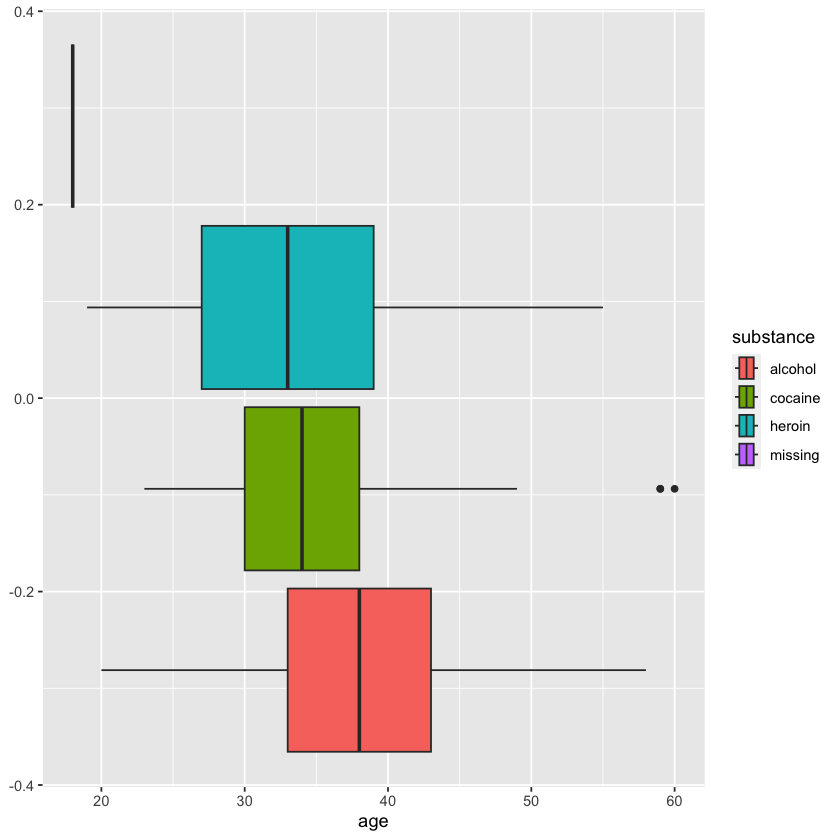

In [13]:
ggplot(data = HELPmiss) +
  geom_boxplot(mapping = aes(x = age, fill = substance))

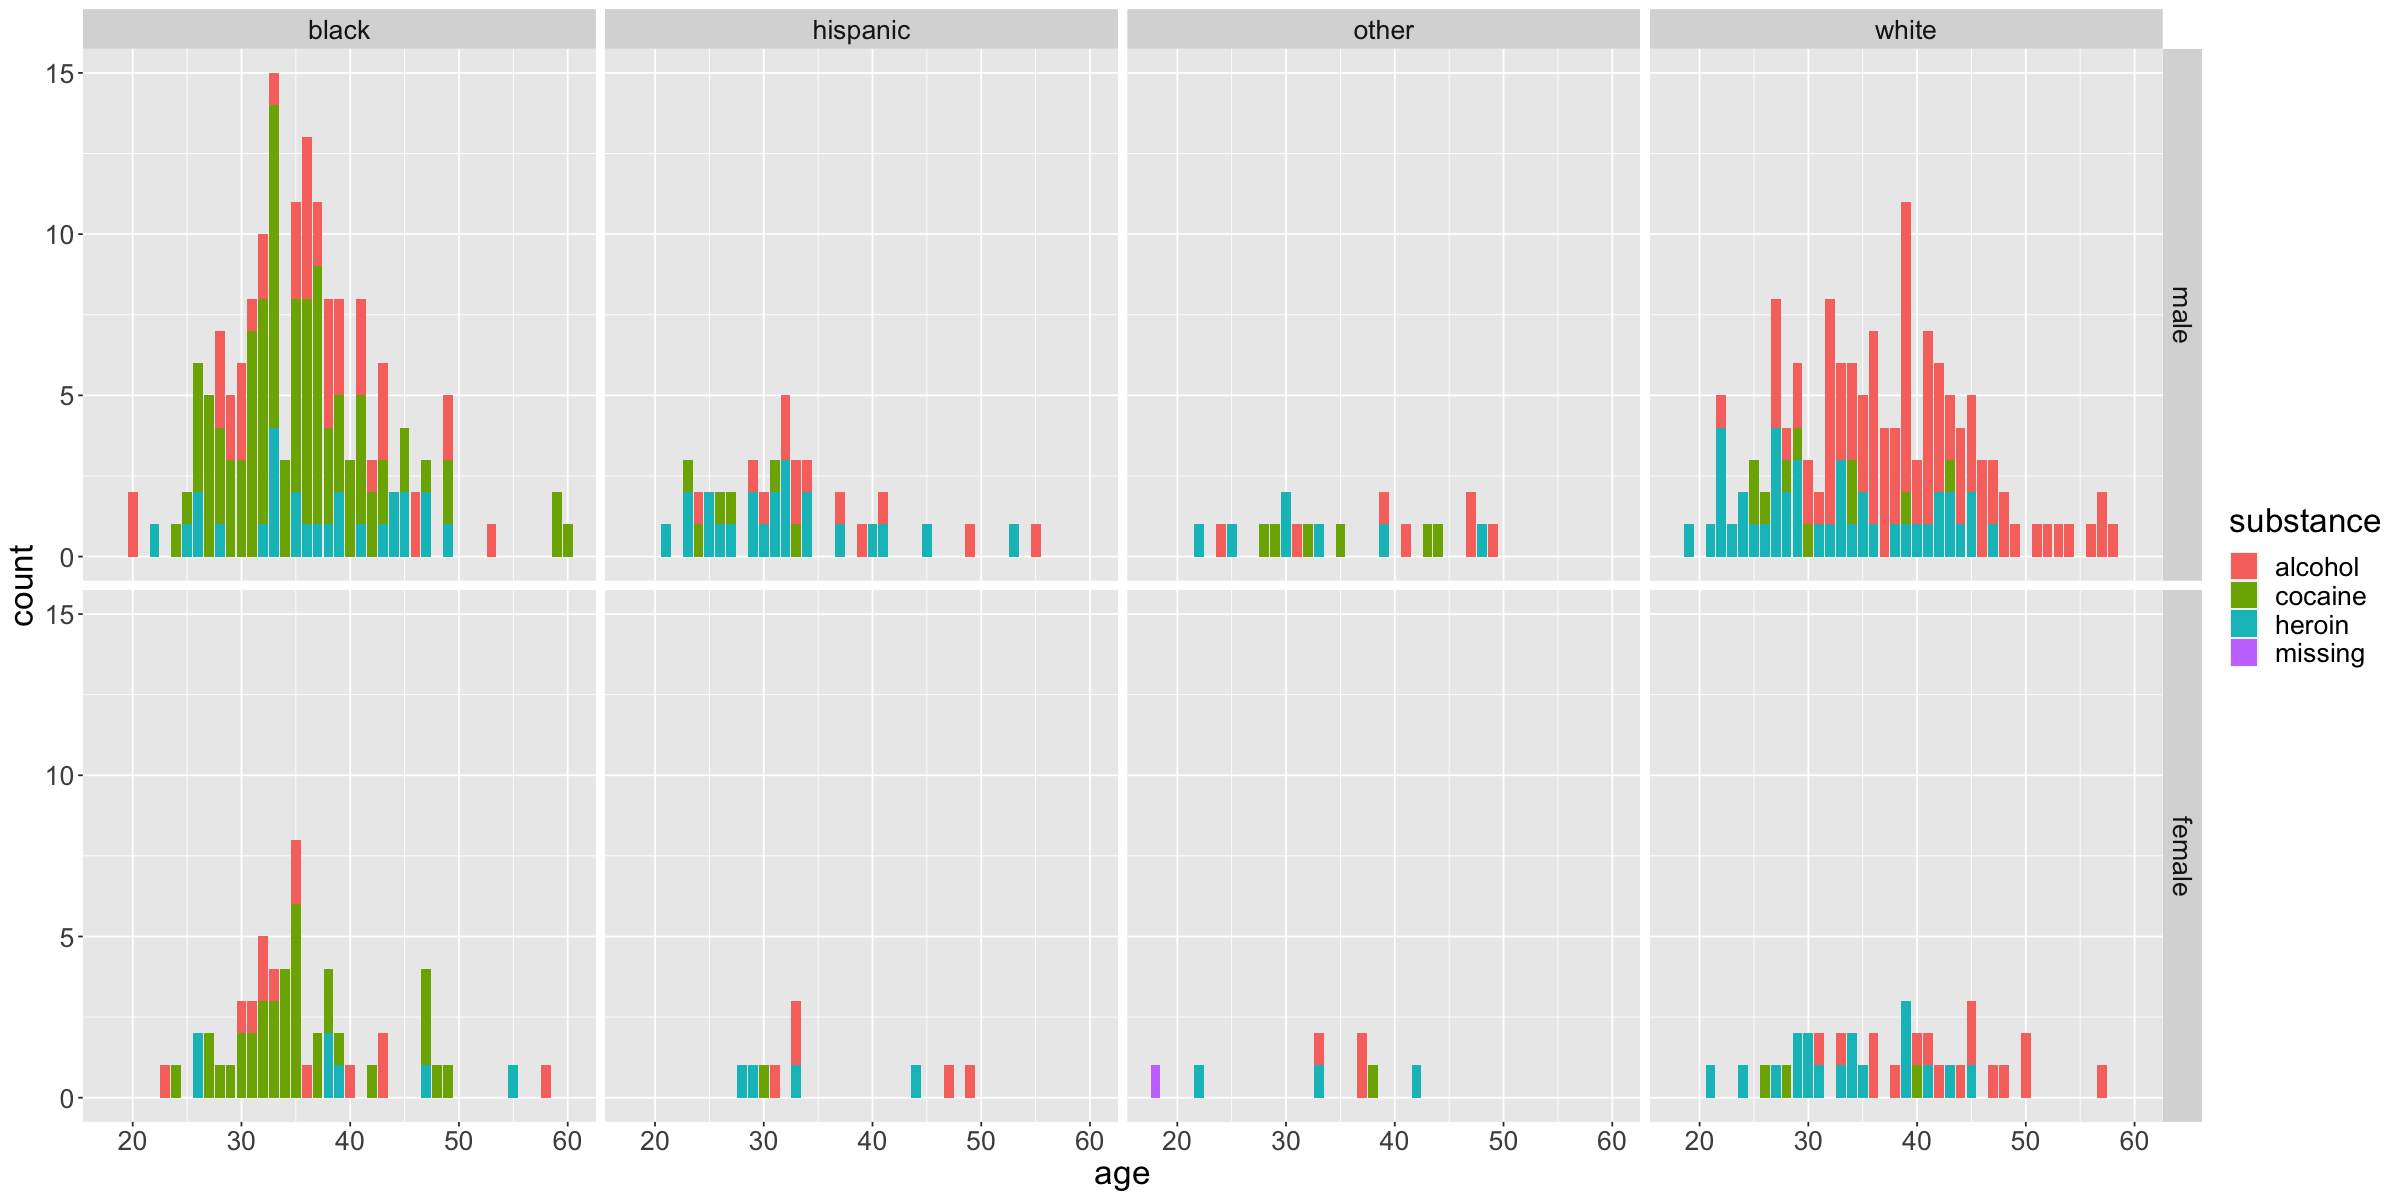

In [14]:
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(data = HELPmiss) +
  geom_bar(
    mapping     = aes(x    = age,
                      fill = substance),
    position    = 'stack',
    show.legend = TRUE,
    stat        = 'count'
  ) +
  facet_grid(sex ~ racegrp) +
  theme(text = element_text(size = 20))

---